In [387]:
!pip install numpy pandas matplotlib seaborn
from matplotlib import pyplot as plt
# from scipy import stats
# from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns

In [388]:
#importing data as a dataframe
whitewine = pd.read_csv('winequality-white.csv')
whitewine

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0      7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6                                                                                                                     
1     6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...                                                                                                                     
2     8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...                                                                                                                     
3     7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
4     7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
...                                                 ...                                                                                                                     
4893  6.2;0.21;0.29;1.6;0.039;24;92;0.99114;3.27;0.5...                                                                                                                     
4894  6.6;0.32;0.36;8;0.047;57;168;0.9949;3.15;0.46;...                                                                                                                     
4895  6.5;0.24;0.19;1.2;0.041;30;111;0.99254;2.99;0....                                                                                                                     
4896  5.5;0.29;0.3;1.1;0.022;20;110;0.98869;3.34;0.3...                                                                                                                     
4897  6;0.21;0.38;0.8;0.02;22;98;0.98941;3.26;0.32;1...                                                                                                                     

[4898 rows x 1 columns]

In [389]:
#Prints the header name
white = list(whitewine)
white

['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"']

In [390]:
#splits the headers name name adds new column headers
whitewine = whitewine['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';', expand=True)

whitewine.columns =["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
whitewine

fixed acidity volatile acidity citric acid residual sugar chlorides  \
0                7             0.27        0.36           20.7     0.045   
1              6.3              0.3        0.34            1.6     0.049   
2              8.1             0.28         0.4            6.9      0.05   
3              7.2             0.23        0.32            8.5     0.058   
4              7.2             0.23        0.32            8.5     0.058   
...            ...              ...         ...            ...       ...   
4893           6.2             0.21        0.29            1.6     0.039   
4894           6.6             0.32        0.36              8     0.047   
4895           6.5             0.24        0.19            1.2     0.041   
4896           5.5             0.29         0.3            1.1     0.022   
4897             6             0.21        0.38            0.8      0.02   

     free sulfur dioxide total sulfur dioxide  density    pH sulphates  \
0                     45                  170    1.001     3      0.45   
1                     14                  132    0.994   3.3      0.49   
2                     30                   97   0.9951  3.26      0.44   
3                     47                  186   0.9956  3.19       0.4   
4                     47                  186   0.9956  3.19       0.4   
...                  ...                  ...      ...   ...       ...   
4893                  24                   92  0.99114  3.27       0.5   
4894                  57                  168   0.9949  3.15      0.46   
4895                  30                  111  0.99254  2.99      0.46   
4896                  20                  110  0.98869  3.34      0.38   
4897                  22                   98  0.98941  3.26      0.32   

     alcohol quality  
0        8.8       6  
1        9.5       6  
2       10.1       6  
3        9.9       6  
4        9.9       6  
...      ...     ...  
4893    11.2       6  
4894     9.6       5  
4895     9.4       6  
4896    12.8       7  
4897    11.8       6  

[4898 rows x 12 columns]

In [391]:
#finds out the type of columns
whitewine.dtypes

fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
dtype: object

In [392]:
#converts the dataframe from string object to numeric
whitewine = whitewine.apply(pd.to_numeric)
whitewine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [393]:
#adds a new column class
#if wine quality is 7 or more, class is 1; otherwise class is 0
whitewine['class'] = np.where(whitewine['quality'] >= 7, 1, 0)
whitewine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  class  
0         8.8        6      0  
1         9.5        6      0  
2        10.1        6      0  
3         9.9        6      0  
4         9.9        6      0  
...       ...      ...    ...  
4893     11.2        6      0  
4894      9.6        5      0  
4895      9.4        6      0  
4896     12.8        7      1  
4897     11.8        6      0  

[4898 rows x 13 columns]

In [394]:
#Checking for missing values
print(whitewine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class                   0
dtype: int64


In [395]:
whitewine.groupby('class').size()

class
0    3838
1    1060
dtype: int64

In [396]:
whitewine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality        class  
count  4898.000000  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909     0.216415  
std       0.151001     0.114126     1.230621     0.885639     0.411842  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.090000     0.410000     9.500000     5.000000     0.000000  
50%       3.180000     0.470000    10.400000     6.000000     0.000000  
75%       3.280000     0.550000    11.400000     6.000000     0.000000  
max       3.820000     1.080000    14.200000     9.000000     1.000000

<AxesSubplot:>

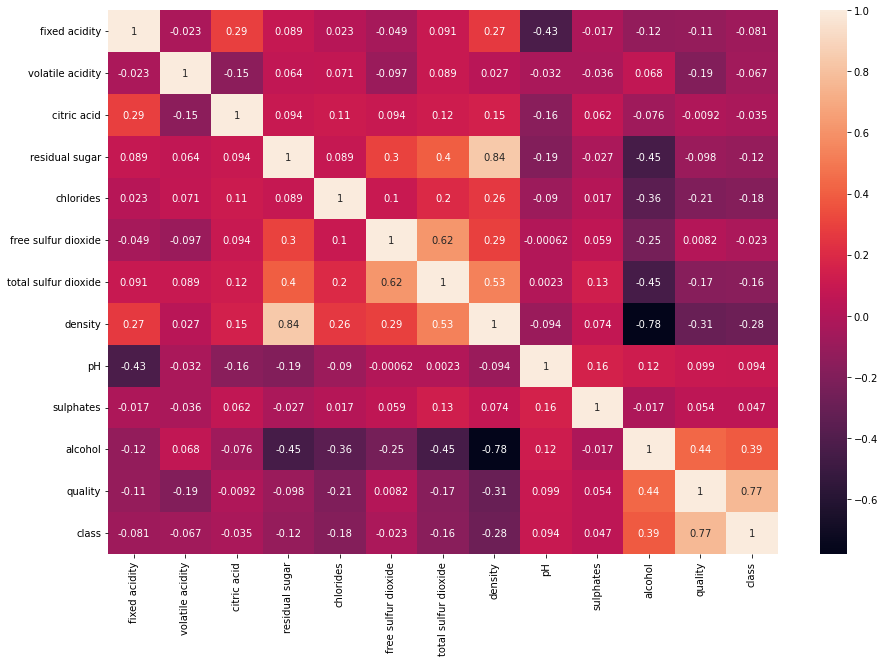

In [397]:
plt.subplots(figsize=(15, 10))
sns.heatmap(whitewine.corr(), annot = True)

In [398]:
whitewine.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   
class                     -0.080748         -0.067225    -0.035330   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.049396   
volatile acidity            0.064286   0.070512            -0.097012   
citric acid                 0.094212   0.114364             0.094077   
residual sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free sulfur dioxide         0.299098   0.101392             1.000000   
total sulfur dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   
quality                    -0.097577  -0.209934             0.008158   
class                      -0.117085  -0.183118            -0.023413   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric acid                       0.121131  0.149503 -0.163748   0.062331   
residual sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free sulfur dioxide               0.615501  0.294210 -0.000618   0.059217   
total sulfur dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
quality                          -0.174737 -0.307123  0.099427   0.053678   
class                            -0.162202 -0.283871  0.093510   0.047410   

                       alcohol   quality     class  
fixed acidity        -0.120881 -0.113663 -0.080748  
volatile acidity      0.067718 -0.194723 -0.067225  
citric acid          -0.075729 -0.009209 -0.035330  
residual sugar       -0.450631 -0.097577 -0.117085  
chlorides            -0.360189 -0.209934 -0.183118  
free sulfur dioxide  -0.250104  0.008158 -0.023413  
total sulfur dioxide -0.448892 -0.174737 -0.162202  
density              -0.780138 -0.307123 -0.283871  
pH                    0.121432  0.099427  0.093510  
sulphates            -0.017433  0.053678  0.047410  
alcohol               1.000000  0.435575  0.385132  
quality               0.435575  1.000000  0.769486  
class                 0.385132  0.769486  1.000000

### Splitting the data

In [399]:
# Separate feature variables and target variable
x = whitewine.drop(['quality','class'], axis = 1)
y = whitewine['class']

In [400]:
x.shape, y.shape

((4898, 11), (4898,))

In [401]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

In [402]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((3673, 11), (1225, 11), (3673,), (1225,))

### Modeling

In [403]:
model = DecisionTreeClassifier()

In [404]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [405]:
tree.plot_tree(model)

In [406]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize=(30,30),dpi=300)
tree.plot_tree(model, feature_names = x.columns,fontsize=10, filled=True);

In [407]:
y_predictions = model.predict(xtest)

In [408]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [409]:
y_predictions = model.predict(xtest)
accuracy_score(y_predictions, ytest)

0.8122448979591836

### Confusion Matrix

In [410]:
confusion_matrix(ytest, y_predictions)

array([[820, 118],
       [112, 175]], dtype=int64)

In [411]:
print(classification_report(ytest, y_predictions))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       938
           1       0.60      0.61      0.60       287

    accuracy                           0.81      1225
   macro avg       0.74      0.74      0.74      1225
weighted avg       0.81      0.81      0.81      1225

